 <font size='5'>If you are stuck implementing EM, check out these 3 videos: <a href="https://www.youtube.com/watch?v=REypj2sy_5U">video1</a>, <a href="https://www.youtube.com/watch?v=iQoXFmbXRJA">video2</a>,  <a href="https://www.youtube.com/watch?v=TG6Bh-NFhA0">video3</a></font>

In [1]:
# (a) load data
import csv
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg
X = np.loadtxt('q2-data\\x.csv', delimiter=',')


mean1=[3,-2]
mean2=[3, 0]
plt.scatter(X[:,0], X[:,1], color='g')
plt.plot(mean1[0],mean1[1], 'r*')
plt.plot(mean2[0],mean2[1], 'r*')

 (b) Probability density function of Bivariate Gaussian Distribution

$$
p(x) = \frac{1}{2\pi\sqrt{||\Sigma ||}}e^{-\frac{1}{2} (x - \mu)^{T} @ \Sigma^{-1}@(x-\mu)}
$$

In [2]:
# (b) E-step functions

# This function computes the probability density of a given data point
# @param xi a given datapoint, in the form of a vector
# @param mean mean vector of the Bivariate Nomal Distribution
# @param covMat covarian matrix, of shape (2, 2)
# @return pXi the probability density of xi, likelihood
def pOfDataPoint(xi, mean, covMat):
    z=-0.5*(np.transpose(xi.reshape(-1,1)-mean)@linalg.pinv(covMat)@(xi.reshape(-1,1)-mean))
    pXi=(np.exp(z)/(2*3.14159*np.sqrt(linalg.det(covMat)))) 
    return pXi

# This function computes the probability densities of given data, it should call pOfDataPoint
# @param x given data, of shape (n, 2), where n is the number of examples
# @param mean mean vector of the Bivariate Nomal Distribution
# @param covMat covarian matrix, of shape (2, 2)
# @return p the probability densities of all data points, likelihoods
def pOfData(x, mean, covMat):
    p=[]
    for i in range(len(x)):
        l=pOfDataPoint(x[i,:], mean, covMat)
        p.append(l)
    p=np.asarray(p)
    return p

# This function computes the posterior probabilities
# @param pLike1 likelihoods of all datapoints for class 1, i.e. p(x|c1)
# @param pLike2 likelihoods of all datapoints for class 2, i.e. p(x|c2)
# @param pC1 prior probability of class 1, scalar
# @param pC2 prior probability of class 2, scalar
# @return pPost1 posterior probabilities of all datapoints for class 1, i.e. p(c1|x), should be a vector
# @return pPost2 posterior probabilities of all datapoints for class 2, i.e. p(c2|x), should be a vector
def pPost(pLike1, pLike2, pC1, pC2):
    pPost1=np.array([])
    pPost2=np.array([])
    for i in range(10000):
        pPost1=np.append(pPost1, pLike1[i]*pC1/(pLike1[i]*pC1+pLike2[i]*pC2))
        pPost2=np.append(pPost2, pLike2[i]*pC2/(pLike1[i]*pC1+pLike2[i]*pC2))
    
    pPost1.reshape(-1,1)
    pPost2.reshape(-1,1)
    return pPost1, pPost2

(c) Set initial values to the following parameters:

$$
p(c1) = p(c2) = 0.5
$$

$$
\mu_1 = \begin{bmatrix}
3\\-2 
\end{bmatrix}
$$

$$
\mu_2 = \begin{bmatrix}
3\\0 
\end{bmatrix}
$$

$$
\Sigma_1 = \Sigma_2 = \begin{bmatrix}
1 &0 \\0 
 &1 
\end{bmatrix}
$$

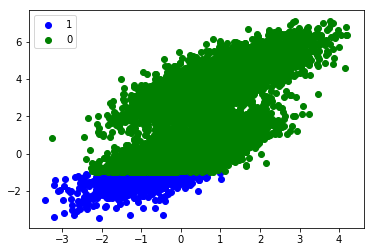

In [9]:
# (c) Initialization
pC1=0.5
pC2=0.5

covMat1=np.array([[1,0],[0,1]])
covMat2=np.array([[1,0],[0,1]])

mean1=np.array([[3],[-2]])
mean2=np.array([[3],[0]])

p1=pOfData(X,mean1,covMat1)
p2=pOfData(X,mean2,covMat2)
posterior1, posterior2=pPost(p1, p2, pC1, pC2)

Y=posterior1>posterior2

plt.scatter(X[Y==True][:,0], X[Y==True][:,1], color='b')
plt.scatter(X[Y==False][:,0], X[Y==False][:,1], color='g')
plt.legend(['1','0'])
plt.show()

(d) Use the following formulas:

$$
p(c) = \frac{1}{n}\sum_{i = 1}^np(c|x_i)
$$

$$
\mu^T = \frac{p(c|x)^T @ x}{np(c)}
$$

$$
\Sigma = \frac{(D * p(c|x))^T @ D}{np(c)}
$$

$$
\mathrm{where} \,\,\, D = x - \mu^T
$$

In [4]:
# (d) M-step function
# hint: you need to make sure p(c|x) is 2-demensional when applying the covariance formula

# This function updates prior probability, mean, and covariance of a class
# @param pPost post probabilities of all data points, i.e. p(c|x), should be a vector
# @return pC updated prior probability, scalar
# @return mean updated mean, vector
# @return covMat covariance matrix, updated covariance, of shape (2, 2)
def update(pPost):
    mean=np.transpose((pPost.reshape(1,-1)@X)/pPost.sum())
    pC=pPost.mean()
    D=X-np.transpose(mean)
    two_D=np.column_stack((pPost, pPost))
    covMat=((np.transpose(D*two_D))@D) /(pPost.sum())  
    return pC, mean, covMat

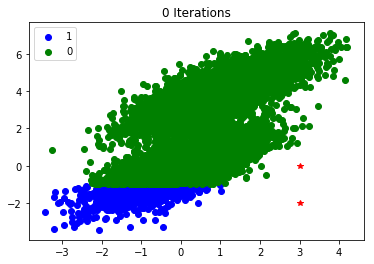

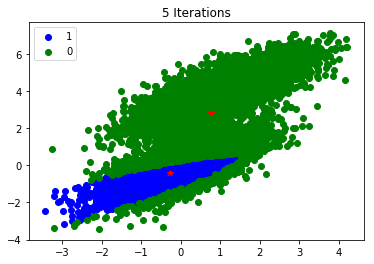

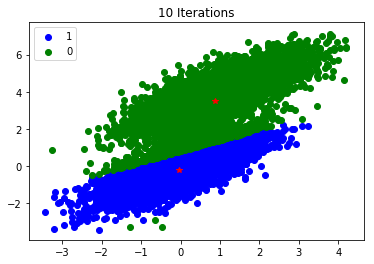

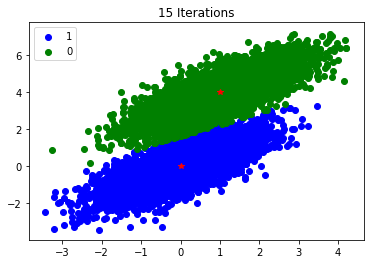

In [8]:
# (e) Training
pC1=0.5
pC2=0.5
covMat1=np.array([[1,0],[0,1]])
covMat2=np.array([[1,0],[0,1]])
mean1=np.array([[3],[-2]])
mean2=np.array([[3],[0]])
num=20
p1=pOfData(X,mean1,covMat1)
p2=pOfData(X,mean2,covMat2)
posterior1, posterior2=pPost(p1, p2, pC1, pC2)

Y=posterior1>posterior2
plt.scatter(X[Y==True][:,0], X[Y==True][:,1], color='b')
plt.scatter(X[Y==False][:,0], X[Y==False][:,1], color='g')
plt.legend(['1','0'])
plt.plot(mean1[0],mean1[1], 'r*')
plt.plot(mean2[0],mean2[1], 'r*')
plt.title('0 Iterations')

plt.show()

for i in range(1,21):
    p1=pOfData(X,mean1,covMat1)
    p2=pOfData(X,mean2,covMat2)
    posterior1, posterior2=pPost(p1, p2, pC1, pC2)
    pC1, mean1, covMat1=update(posterior1)
    pC2, mean2, covMat2=update(posterior2)
    if(i<20 and i%5==0):
        Y=posterior1>posterior2

        plt.scatter(X[Y==True][:,0], X[Y==True][:,1], color='b')
        plt.scatter(X[Y==False][:,0], X[Y==False][:,1], color='g')
        plt.legend(['1','0'])
        plt.plot(mean1[0],mean1[1], 'r*')
        plt.plot(mean2[0],mean2[1], 'r*')
        plt.title('%d Iterations'%i)
        
        plt.show()
        

#(f)
1.K means clustering is a form of hard assignment. Assign the centroid and optimize the centroid based on the distances from the points to it. We are certain that a particular point in any iteration belongs to a particular cluster. This may lead to misgrouping.Gaussian mixture models are soft assignment. They take into account probabilities that a point belongs to a cluster in a given iteration using normal distribution.
2.K means is better for higher dimensional data. GMM uses all its components and is not useful for high dimensional data.
3.K means does not work well with with non linear data i.e. complex geometric distributions as it only allows for spherical clusters. GMM is preferred in this case of non-linear data with complex geometric distribution because clusters are not always circular. It is more helpful when soft assignment or mixed membership is needed. 
eg:news articles can belong to multiple topic clusters
